<a href="https://colab.research.google.com/github/theysee/sberbank_reboot/blob/master/%D0%9F%D1%80%D0%BE%D0%BC%D0%B5%D0%B6%D1%83%D1%82%D0%BE%D1%87%D0%BD%D0%BE%D0%B5_%D1%82%D0%B5%D1%81%D1%82%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%A2%D0%B2%D0%BE%D1%80%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_%D0%A1%D0%B5%D1%80%D0%B3%D0%B5%D0%B9_%D0%90%D1%80%D1%82%D0%B5%D0%B5%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Творческое задание
## Розничные покупки онлайн
**Сюжет: Промышленный шпионаж**

К вам в руки попал дамп базы продаж одного из крупных онлайн ретейлеров. Этот ретейлер является вашим конкурентом, и вы начали исследовать полученные данные.

**Требования**

0.   Скопируйте исходный ноутбук себе. В своём ноутбуке делаете задание
1.   Гуглить разрешается
2.   Убирайте ненужные вам клетки с кодом, и постарайтесь не отходить от логической структуры этого ноутбука
3.   Оформляйте графики так, чтобы они были читаемыми. Оформляйте легенду, заголовки, подписывайте оси в соответствующем масштабе и единицах измерения
4.   **Ваш ноутбук должен запускаться, и выполняться без ошибок сверху вниз. Иначе творческая работа оценивается в 0 баллов.**
5.   После того как вы сделали работу, нужно вызвать ctrl+s (сохранить ноутбук),
затем File->Download as .ipynb. Полученный файл нужно залить в форму опросника в соответствующей секции. В названии ноутбука не забудьте указать **имя и фамилию** в соответствующем месте


. 

Всего баллов 48.

### Шаг 1. Импортируйте нужные библиотеки. (1 балл)

In [0]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

### Шаг 2. Загрузите данные в переменную online_rt (1 балл)
Замечание: если вы получаете ошибку декодирования, то передайте аргумент encoding='latin1' в pd.read_csv().

Файл расположен по адресу 'http://89.223.95.235/file/Online_Retail.csv'
его можно сразу передавать в функцию pd.read_csv

In [0]:
online_rt = pd.read_csv('http://89.223.95.235/file/Online_Retail.csv', encoding='latin1')

### Шаг 3. Удалите из выборки некорректные данные (2 балла)
Похоже, что у вашего конкурента не самая консистентная база данных, удалите некорректные строки из датафрейма

In [490]:
# Посмотрим, что за данные мы вообще получили.
online_rt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [491]:
# Посмотрим инфо о датасете.
online_rt.info()
# Видим значения NAN, взять неоткуда, поэтому целесообразно удалить.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [492]:
# Удаляем некорректные поля.
data = online_rt.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      406829 non-null object
StockCode      406829 non-null object
Description    406829 non-null object
Quantity       406829 non-null int64
InvoiceDate    406829 non-null object
UnitPrice      406829 non-null float64
CustomerID     406829 non-null float64
Country        406829 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [493]:
# В дальнейшем, при построении графиков, мы заметим, что поле Quantity содержит отрицательные значения.
# Поэтому, будет логично разделить данные на 2 датасета - продажи и возвраты.

data_sales = data[data['Quantity'] >= 0 ]
data_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      397924 non-null object
StockCode      397924 non-null object
Description    397924 non-null object
Quantity       397924 non-null int64
InvoiceDate    397924 non-null object
UnitPrice      397924 non-null float64
CustomerID     397924 non-null float64
Country        397924 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 27.3+ MB


In [494]:
data_return = data[data['Quantity'] < 0]
data_return.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8905 entries, 141 to 541717
Data columns (total 8 columns):
InvoiceNo      8905 non-null object
StockCode      8905 non-null object
Description    8905 non-null object
Quantity       8905 non-null int64
InvoiceDate    8905 non-null object
UnitPrice      8905 non-null float64
CustomerID     8905 non-null float64
Country        8905 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 626.1+ KB


### Шаг 4.1. Отобразите столбчатую диаграмму с 10-ю странами в которых произошло наибольшее количество продаж в терминах количества (Quantity) (5 баллов)

In [495]:
# Найдём этот десяток стран и запишем в новый DF. Сначала смотрим продажи.
sales_quantity = data_sales.groupby(['Country'])['Quantity'].agg(['sum']).sort_values(by='sum', ascending=False).head(10)
sales_quantity
# Видим, что одна страна выбивается из общей массы.

,sum
Country,
United Kingdom,4269472
Netherlands,200937
EIRE,140525
Germany,119263
France,111472
Australia,84209
Sweden,36083
Switzerland,30083
Spain,27951


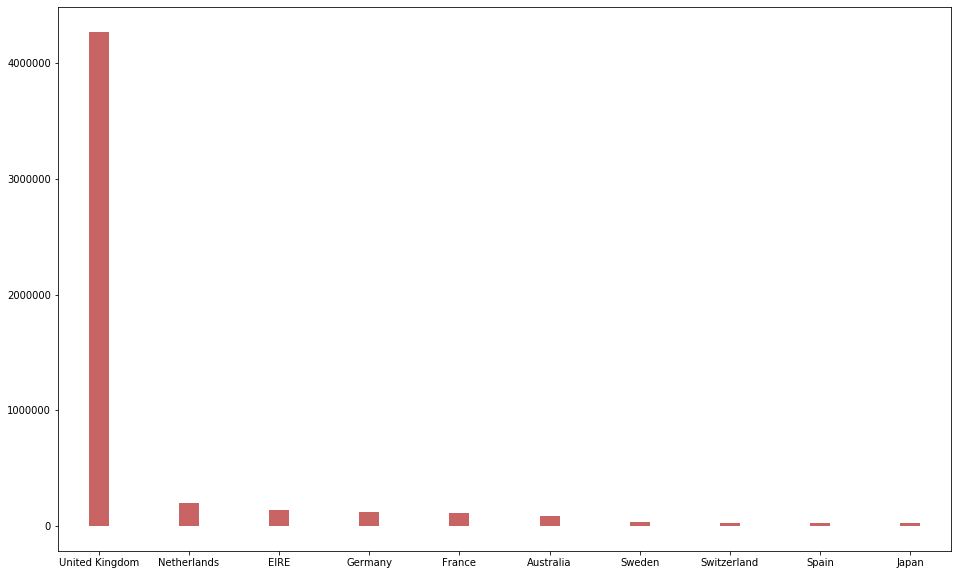

In [496]:
# Продажи 
sales_quantity.reset_index(inplace=True)
fig, ax = plt.subplots(figsize=(16,10), facecolor='white')
ax.vlines(x=sales_quantity['Country'], ymin=0, ymax=sales_quantity['sum'], color='firebrick', alpha=0.7, linewidth=20)
plt.show()

In [497]:
# Проведём анализ возвратов.

return_quantity = data_return.groupby(['Country'])['Quantity'].agg(['sum']).sort_values(by='sum', ascending=True).head(10)
return_quantity

# Логично, что там где больше продаж, там и больше возвратов.

,sum
Country,
United Kingdom,-260939
EIRE,-4196
Germany,-1815
France,-1624
USA,-1424
Spain,-1127
Netherlands,-809
Japan,-798
Australia,-556


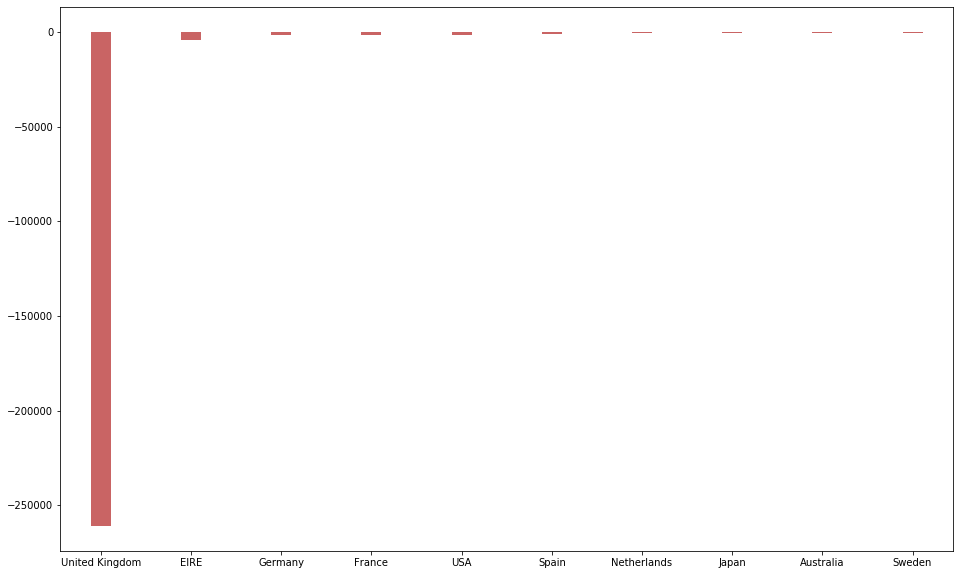

In [498]:
# Возвраты
return_quantity.reset_index(inplace=True)
fig, ax = plt.subplots(figsize=(16,10), facecolor='white')
ax.vlines(x=return_quantity['Country'], ymin=0, ymax=return_quantity['sum'], color='firebrick', alpha=0.7, linewidth=20)
plt.show()

In [499]:
# Ради интереса найдём процент возвратов к продаже.
(-1 * return_quantity['sum']/sales_quantity['sum'])*100

0    6.111739
1    2.088217
2    1.291585
3    1.361696
4    1.277451
5    1.338337
6    2.242053
7    2.652661
8    1.989195
9    1.714330
Name: sum, dtype: float64

### Шаг 4.2. Отобразите такую же диаграмму, но без Великобритании (1 балл)

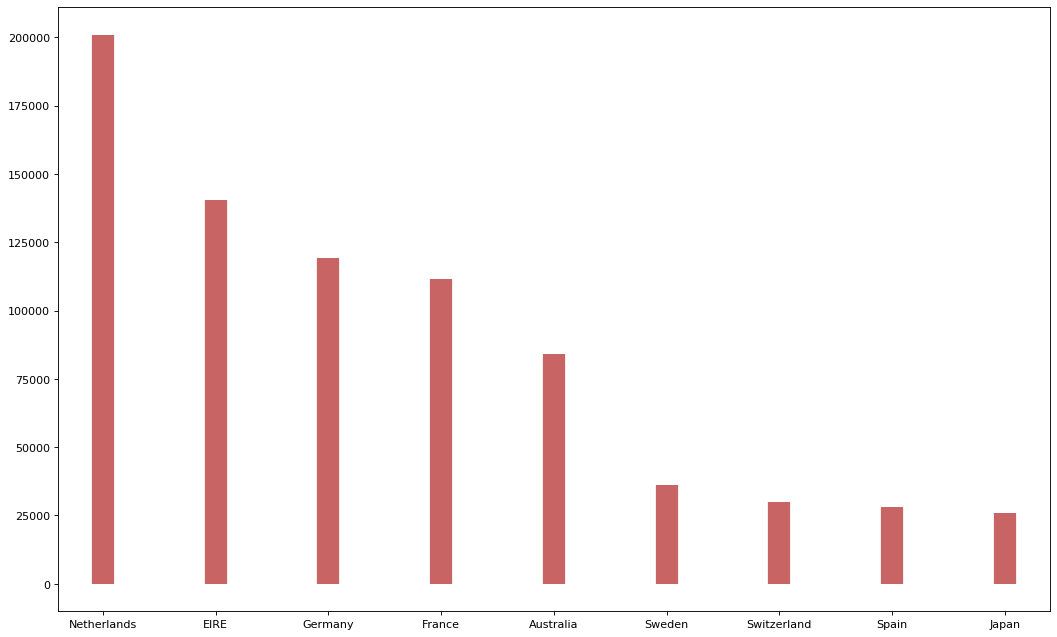

In [500]:
# Sales
data_wuk_s = sales_quantity[sales_quantity['Country'] != 'United Kingdom']
fig, ax = plt.subplots(figsize=(16,10), facecolor='white', dpi= 80)
ax.vlines(x=data_wuk_s['Country'], ymin=0, ymax=data_wuk_s['sum'], color='firebrick', alpha=0.7, linewidth=20)
plt.show()

### Шаг 5. Создаёте колонку выручки с каждой продажи (2 балла)

In [501]:
# Выручка с продаж.

data_sales['Revenue'] = (data_sales['Quantity'] * data_sales['UnitPrice'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Шаг 6.1. Отобразите график отображающий зависимость выручки от стоимости за единицу (для всего набора данных). (10 баллов)
График должен быть читаемым. Предлагается разбить UnitPrice на интервалы, в этом могут помочь функции np.arange() и pd.cut().

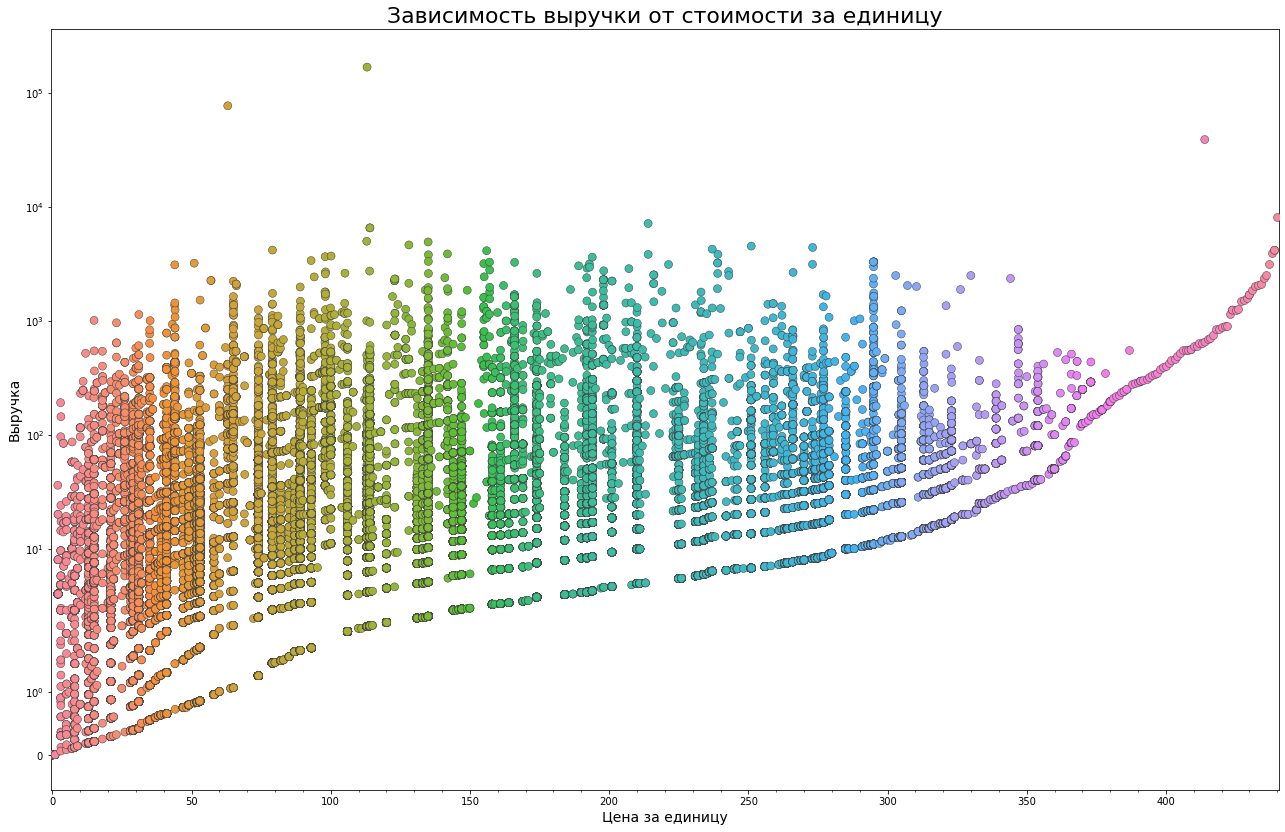

In [502]:
# Разбивать не вижу смысла, а применю комбинированный масштаб по выручке.
fig, ax = plt.subplots(figsize=(22,14))    
ax.set_yscale ('symlog')
sns.stripplot(data_sales['UnitPrice'], data_sales['Revenue'], jitter=0.1, size=8, ax=ax, linewidth=.5)
ax.xaxis.set_major_locator(MultipleLocator(50))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.xaxis.set_minor_locator(MultipleLocator(10))

# Украшения
plt.title('Зависимость выручки от стоимости за единицу', fontsize=22)
plt.xlabel("Цена за единицу", fontsize=14)
plt.ylabel("Выручка", fontsize=14)
plt.show()

# Параметры графика помогает избежать наложения точек друг на друга.

### Шаг 6.2 Какой вывод можно сделать из этого графика? (1 балл)

Каждая точка, это продажа определённого количества товара.

Анализ:
1. Чем больше цена, тем больше выручка за одну продажу.
2. Чем меньше цена, тем больше происходит продаж разного количества товаров.
3. Видим несколько выбросов по выручке.
4. Количество продаж после цены, примерно в 360, падает.
5. Основная прибыль компании генерится продажами, которые происходят в сегменте до 360.

### Шаг 7.1. Создайте колонки day и month целочисленного типа. (5 баллов)
Подсказка: для начала определите в каком формате содержится InvoiceDate

In [503]:
data_sales.dtypes
# Видим, что дата это object

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
Revenue        float64
dtype: object

In [504]:
import datetime as dt
data_sales['InvoiceDate'] =  pd.to_datetime(data_sales['InvoiceDate'], infer_datetime_format=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [505]:
data_sales.dtypes
# Всё в порядке, теперь формат datetime64[ns]

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
Revenue               float64
dtype: object

In [506]:
# Делаем целевые столбцы
data_sales['day'] = data_sales['InvoiceDate'].dt.day
data_sales['month'] = data_sales['InvoiceDate'].dt.month

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [507]:
# Как видим, целевые столбцы целочисленные int64
data_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 11 columns):
InvoiceNo      397924 non-null object
StockCode      397924 non-null object
Description    397924 non-null object
Quantity       397924 non-null int64
InvoiceDate    397924 non-null datetime64[ns]
UnitPrice      397924 non-null float64
CustomerID     397924 non-null float64
Country        397924 non-null object
Revenue        397924 non-null float64
day            397924 non-null int64
month          397924 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(3), object(4)
memory usage: 46.4+ MB


### Шаг 7.2. Отобразите помесячную выручку для всех стран за 2011 год (по отдельности) в виде stacked barplot (10 баллов)

In [0]:
# Сначала выберем нужные нам данные из основного датасета. И подготовим их.
data_sales_2011 = data_sales[data_sales['InvoiceDate'].dt.year == 2011]
data_sales_2011 = data_sales_2011.groupby(['Country', 'month']).sum()
data_sales_2011.reset_index(inplace=True)

In [509]:
# Найдём количество стран.
s = data_sales_2011.drop_duplicates('Country')
s.shape

(36, 7)

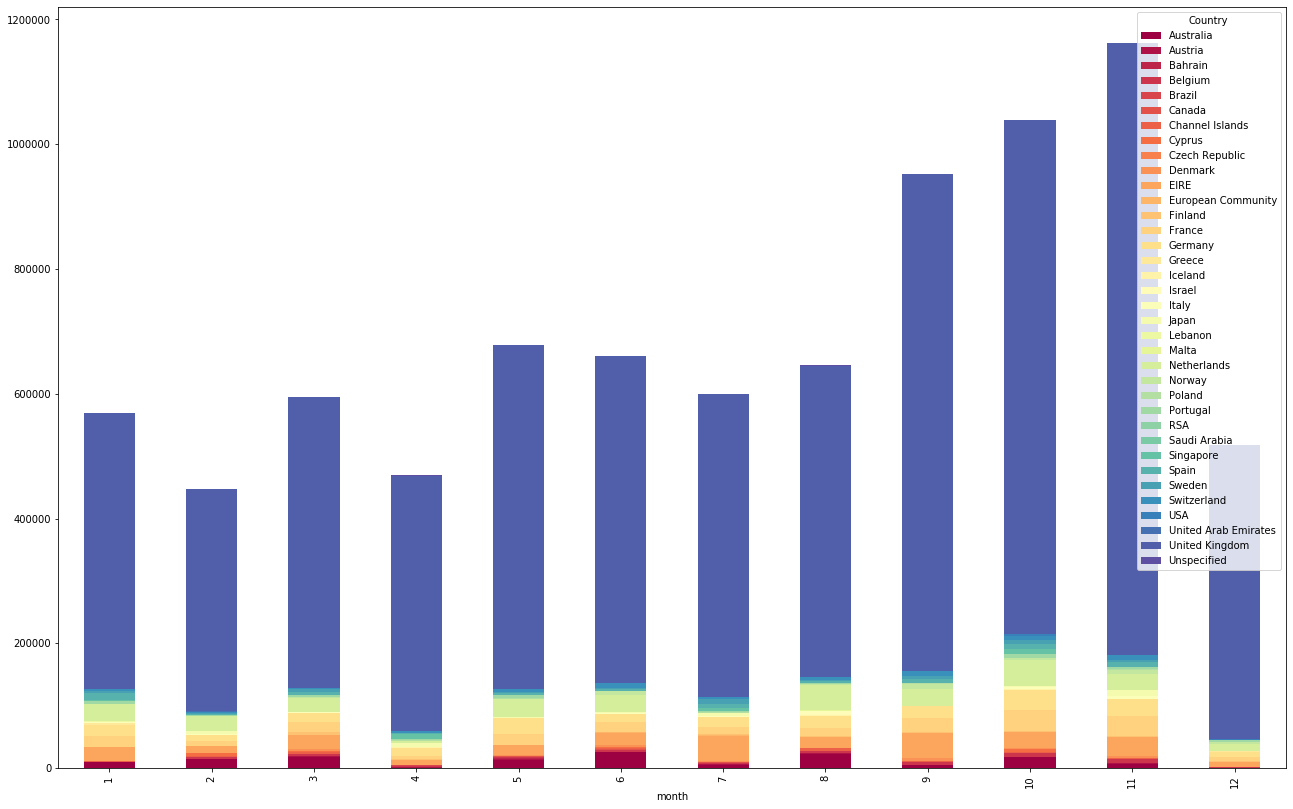

In [510]:
df = data_sales_2011

pivot_df = df.pivot(index='month', columns='Country', values='Revenue')
pivot_df.fillna(0)

spectral = cm.get_cmap('Spectral', 36)
colors = spectral(np.linspace(0, 1, 36))

pivot_df.plot.bar(stacked=True, color=colors, figsize=(22,14))

In [511]:
# Просто ради интереса, как это делается на plotly.
# Библиотека полностью бесплатна при работе в offline.

import plotly.express as px
fig = px.bar(data_sales_2011, x='month', y='Revenue', color='Country', 
             title='Выручка всех стран в 2011', height=1000)

fig.show()

### Шаг 7.3. Отобразите такой же график, но без Великобритании (1 балл)

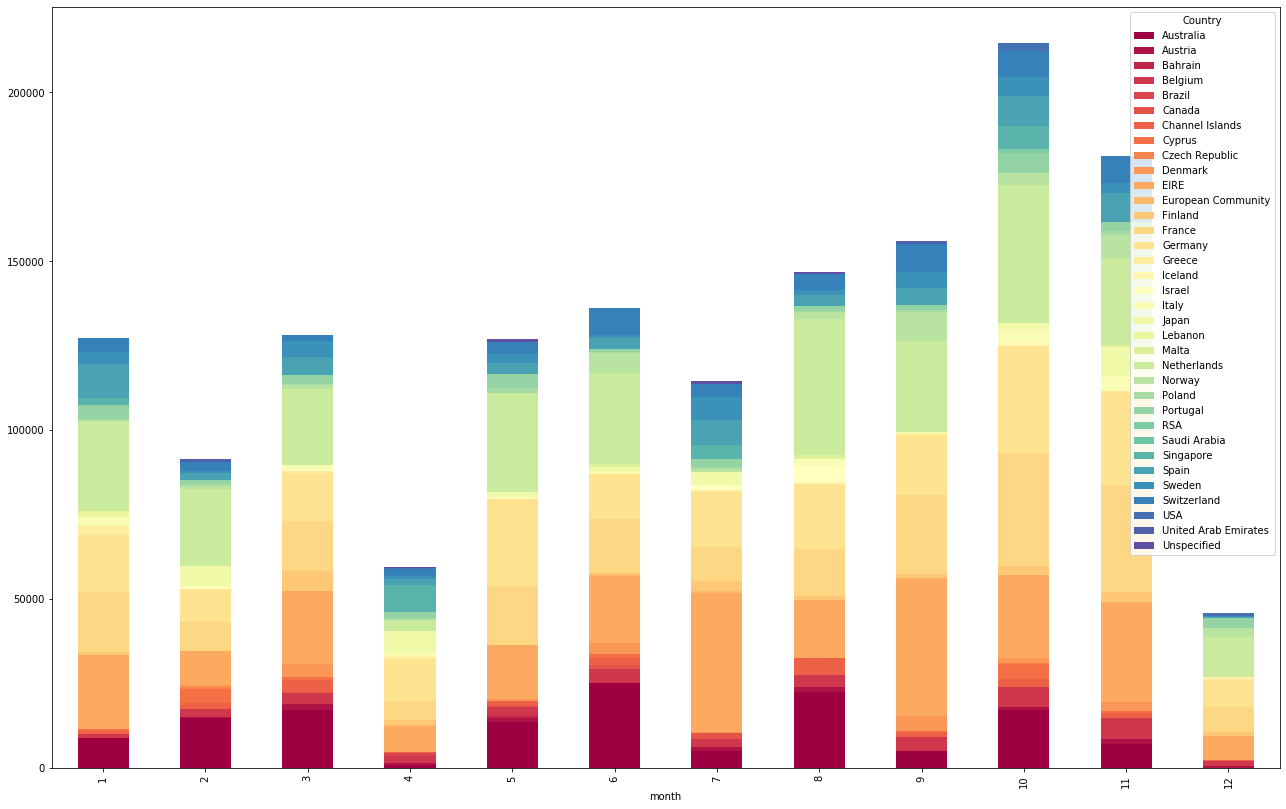

In [512]:
df = data_sales_2011[data_sales_2011['Country'] != 'United Kingdom']

pivot_df = df.pivot(index='month', columns='Country', values='Revenue')
pivot_df.fillna(0)

spectral = cm.get_cmap('Spectral', 35)
colors = spectral(np.linspace(0, 1, 35))

pivot_df.plot.bar(stacked=True, color=colors, figsize=(22,14))

In [513]:
fig = px.bar(df, x='month', y='Revenue', color='Country', 
             title='Выручка всех стран в 2011', height=1000)

fig.show()

### Шаг 7.4. Какой вывод можно сделать из этих графиков? (1 балл)

1. Основная выручка была сгенерирована в Великобритании.
2. Другие страны увеличивали свою долю выручки в ноябре.
3. Общая выручка растёт с сентября в Великобритании, а в других странах с октября.
4. В других странах максимальная выручка в октябре, а в Великобритании в ноябре.
5. Наблюдается очевидная сезонность.

### Шаг 8.1. Отобразите для Нидерландов график дневной выручки в Ноябре 2011. (5 баллов)

In [0]:
# Преобразуем датафрейм
df = data_sales[(data_sales['Country'] == 'Netherlands') & (data_sales['month'] == 11)]
df = df.groupby(['day']).sum()
df.reset_index(inplace=True)

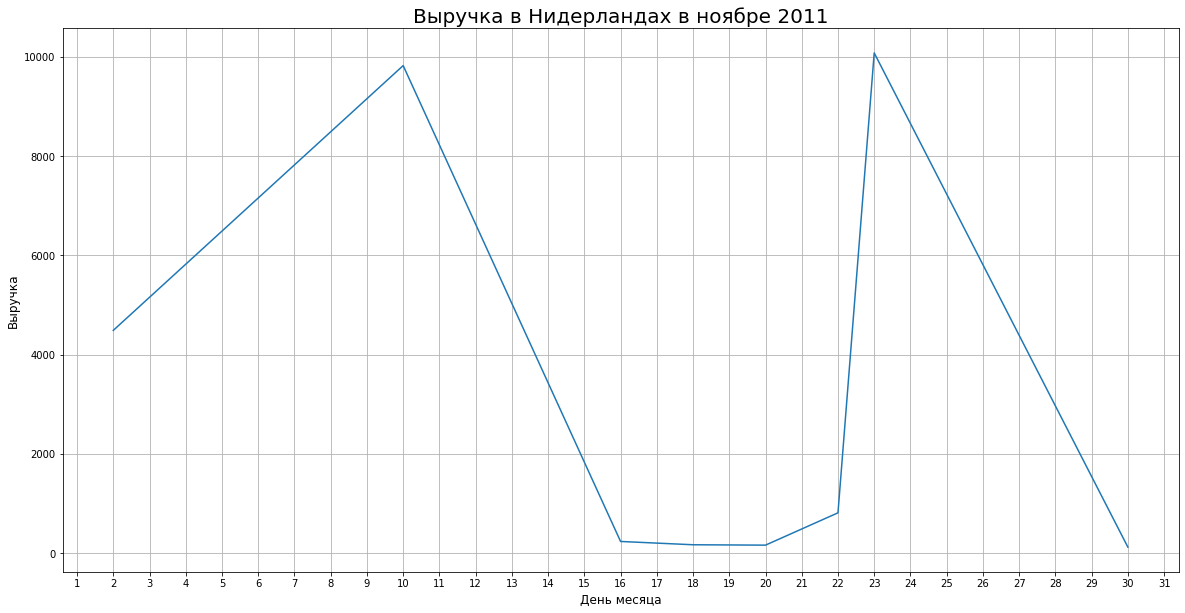

In [515]:
fig, ax = plt.subplots(figsize=(20,10))    

ax.plot(df['day'], df['Revenue'], label='Выручка')
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))


plt.title('Выручка в Нидерландах в ноябре 2011', fontsize=20)
plt.xlabel("День месяца", fontsize=12)
plt.ylabel("Выручка", fontsize=12)
plt.grid()

plt.show()

### Шаг 8.2. В какой день выручка максимальная? (2 балла)

In [516]:
# Если речь обо всём датасете.
data_sales[data_sales['Revenue'] == data_sales.Revenue.max()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,day,month
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,168469.6,9,12


In [517]:
# Если речь о Нидерландах.
df = data_sales[data_sales['Country'] == 'Netherlands']
df[df['Revenue'] == df.Revenue.max()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,day,month
421601,573003,23084,RABBIT NIGHT LIGHT,2400,2011-10-27 12:11:00,2.08,14646.0,Netherlands,4992.0,27,10
